In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

24460


In [3]:
reload(classes.field_of_view)

before_fov_param = {'data_folder': r'\\dolly\Raw_data_5\shiwei\20201221-Acr_ctp08_P_brain\Before_clearing',
                 #'save_folder':r'V:\20201221-Acr_ctp08_P_brain\Before_clearing\New',
                 'save_folder':r'\\crick\Shiwei_Data_1\20201221-Acr_ctp08_P_brain\Before_clearing\New', # use outside crick
                 'experiment_type': 'DNA',
                 'num_threads': 12,
                 'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201204-Corrections_3color_50',
                 'shared_parameters':{
                         'single_im_size':[50,2048,2048],
                         'corr_channels':['750','647'],
                         'num_empty_frames': 0, 
                         'corr_hot_pixel':True,
                         'corr_Z_shift':False,
                         'min_num_seeds':500,
                         'max_num_seeds': 2500,
                         'spot_seeding_th':150,
                         'normalize_intensity_local':False,
                         'normalize_intensity_background':False,
                     },             
                 }

after_fov_param = {'data_folder': r'\\dolly\Raw_data_5\shiwei\20201221-Acr_ctp08_P_brain\After_clearing',
                   #'save_folder':r'V:\20201221-Acr_ctp08_P_brain\After_clearing\New',
                   'save_folder':r'\\crick\Shiwei_Data_1\20201221-Acr_ctp08_P_brain\After_clearing\New', # use outside crick
                 'experiment_type': 'DNA',
                 'num_threads': 12,
                 'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201204-Corrections_3color_50',
                 'shared_parameters':{
                         'single_im_size':[50,2048,2048],
                         'corr_channels':['750','647'],
                         'num_empty_frames': 0, 
                         'corr_hot_pixel':True,
                         'corr_Z_shift':False,
                         'min_num_seeds':500,
                         'max_num_seeds': 2500,
                         'spot_seeding_th':150,
                         'normalize_intensity_local':False,
                         'normalize_intensity_background':False,
                     },             
             }

#fov_ids = np.arange(5,11)
fov_ids = np.arange(5,6)

In [4]:
for _fov_id in fov_ids:
    before_fov = classes.field_of_view.Field_of_View(before_fov_param, _fov_id=_fov_id,
        _color_info_kwargs={
          '_color_filename':'Color_Usage',
        }, 
        _prioritize_saved_attrs=False,
        )
    after_fov = classes.field_of_view.Field_of_View(after_fov_param, _fov_id=_fov_id,
        _color_info_kwargs={
          '_color_filename':'Color_Usage',
        }, 
        _prioritize_saved_attrs=False,
        )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 11
- Number of field of views: 88
- Importing csv file: \\dolly\Raw_data_5\shiwei\20201221-Acr_ctp08_P_brain\Before_clearing\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 11 folders are found according to color-usage annotation.
+ loading fov_info from file: \\crick\Shiwei_Data_1\20201221-Acr_ctp08_P_brain\Before_clearing\New\Conv_zscan_05.hdf5
++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'dapi_im', 'ref_im'] in 14.981s.
+ loading correction from file: \\crick\Shiwei_Data_1\20201221-Acr_ctp08_P_brain\Before_clearing\New\Conv_zscan_05.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segme

<IPython.core.display.Javascript object>


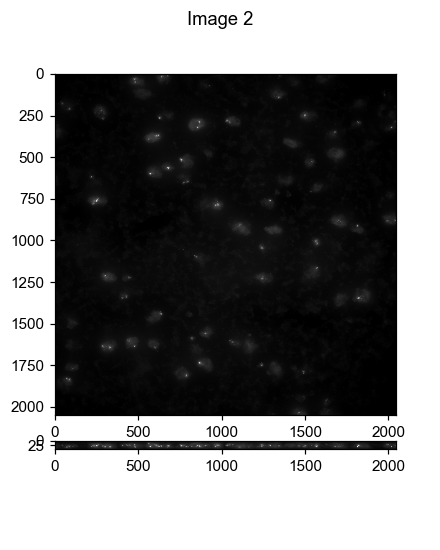

In [6]:
visual_tools.imshow_mark_3d_v2([before_fov.dapi_im, before_fov.chrom_im])

In [49]:
with h5py.File(before_fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    before_ims = _grp['ims'][:9]

In [50]:
with h5py.File(after_fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    after_ims = _grp['ims'][:9]

<IPython.core.display.Javascript object>


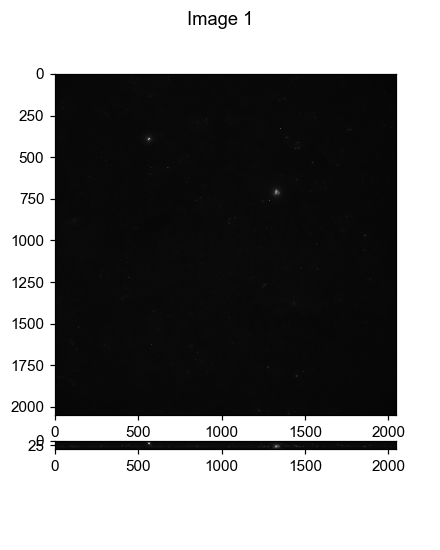

In [10]:

visual_tools.imshow_mark_3d_v2(vis_ims)

In [32]:
reload(ia.figure_tools.image)
from ImageAnalysis3.figure_tools.image import visualize_2d_gaussian, visualize_2d_projection
from ImageAnalysis3.figure_tools.color import black_gradient,transparent_gradient
from ImageAnalysis3.figure_tools import _dpi, _single_col_width,_double_col_width, _font_size, _ticklabel_size, _ticklabel_width

In [68]:
crop = tuple([slice(0,-1), slice(1100,1800), slice(300,1000)])

<IPython.core.display.Javascript object>


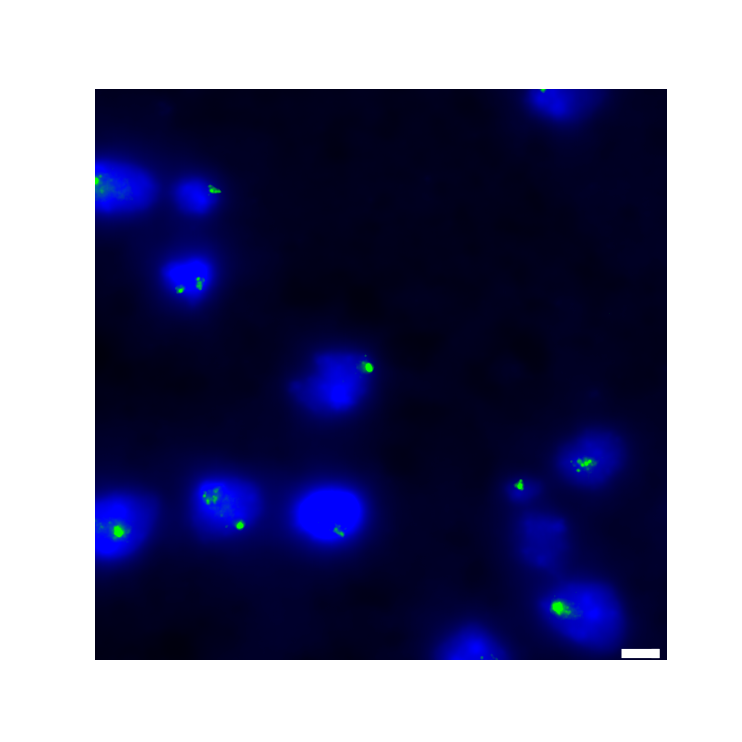

In [83]:
ax = visualize_2d_projection(before_fov.dapi_im[crop], 
                             figure_width=_single_col_width, figure_dpi=300,
                             cmap=black_gradient([0.,0.,1], transparent=False), 
                             color_limits=[1000,10000], 
                             add_reference_bar=True,
                             reference_bar_color=[1,1,1])

ax = visualize_2d_projection(before_fov.chrom_im[crop], 
                             ax=ax,
                             figure_width=_single_col_width, figure_dpi=300,
                             projection_type='max',
                             cmap=transparent_gradient([0,1.,0.]),
                             figure_alpha=1,
                             color_limits=[8000,16000], 
                             reference_bar_length=5000/ia._distance_zxy[-1],
                             reference_bar_color=[1,1,1],
                             save_folder=figure_folder, save=True, save_basename='whole_lib_before_clearing')

In [72]:
figure_folder = os.path.join('.', 'figures')
if not os.path.exists(figure_folder):
    os.makedirs(figure_folder)

<IPython.core.display.Javascript object>


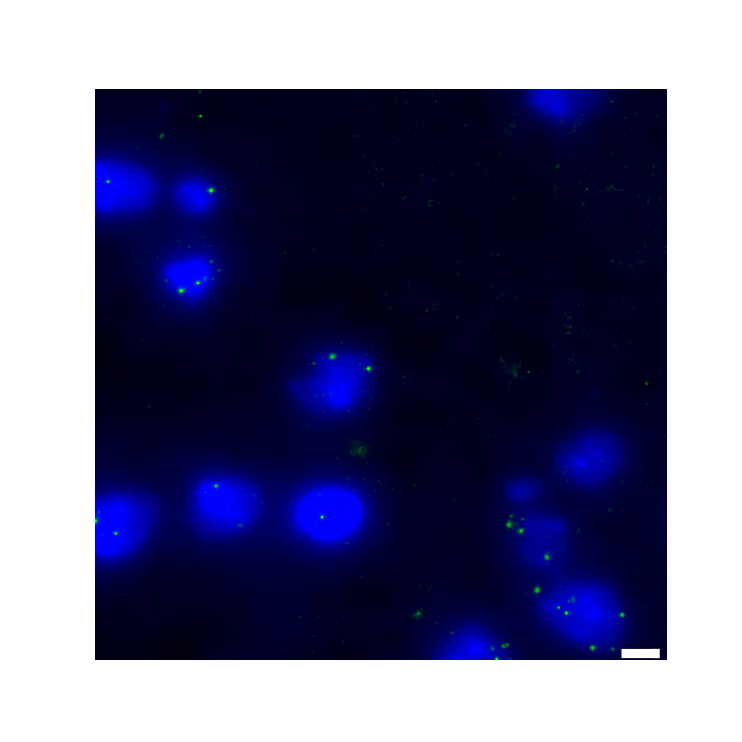

In [73]:
ax = visualize_2d_projection(before_fov.dapi_im[crop], 
                             figure_width=_single_col_width, figure_dpi=300,
                             cmap=black_gradient([0.,0.,1], transparent=False), 
                             color_limits=[1000,10000], 
                             add_reference_bar=True,
                             reference_bar_color=[1,1,1])

ax = visualize_2d_projection(before_ims[0][crop], 
                             ax=ax,
                             figure_width=_single_col_width, figure_dpi=300,
                             projection_type='max',
                             cmap=transparent_gradient([0,1.,0.]),
                             figure_alpha=1,
                             color_limits=[1000,3000], 
                             reference_bar_length=5000/ia._distance_zxy[-1],
                             reference_bar_color=[1,1,1], 
                             save_folder=figure_folder, save=True, save_basename='5kb_before_clearing')

<IPython.core.display.Javascript object>


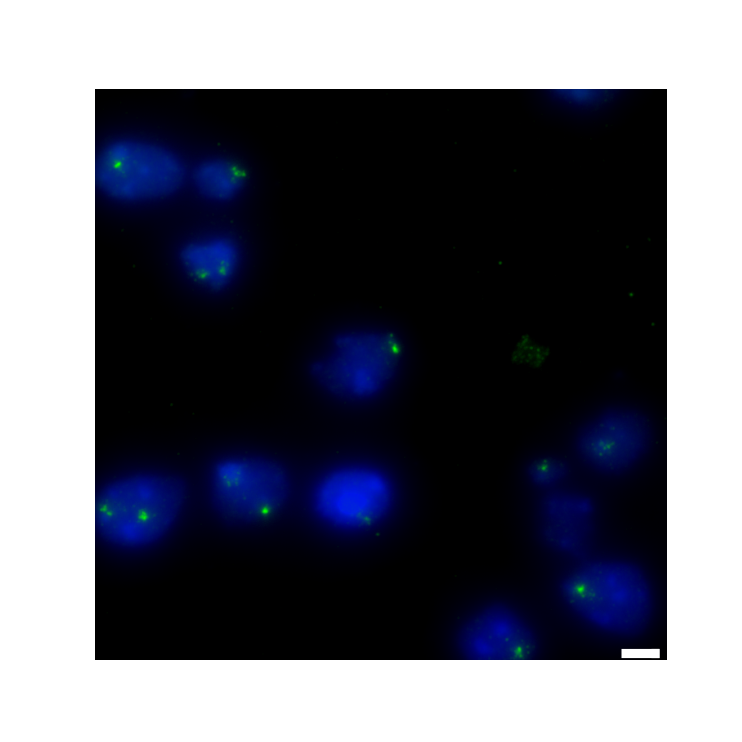

In [81]:
ax = visualize_2d_projection(after_fov.dapi_im[crop], 
                             figure_width=_single_col_width, figure_dpi=300,
                             cmap=black_gradient([0.,0.,1], transparent=False), 
                             color_limits=[500,5000], 
                             add_reference_bar=True,
                             reference_bar_color=[1,1,1])

ax = visualize_2d_projection(after_fov.chrom_im[crop], 
                             ax=ax,
                             figure_width=_single_col_width, figure_dpi=300,
                             projection_type='max',
                             cmap=transparent_gradient([0,1.,0.]),
                             figure_alpha=1,
                             color_limits=[500,4000], 
                             reference_bar_length=5000/ia._distance_zxy[-1],
                             reference_bar_color=[1,1,1],
                             save_folder=figure_folder, save=True, save_basename='whole_lib_after_clearing')

<IPython.core.display.Javascript object>


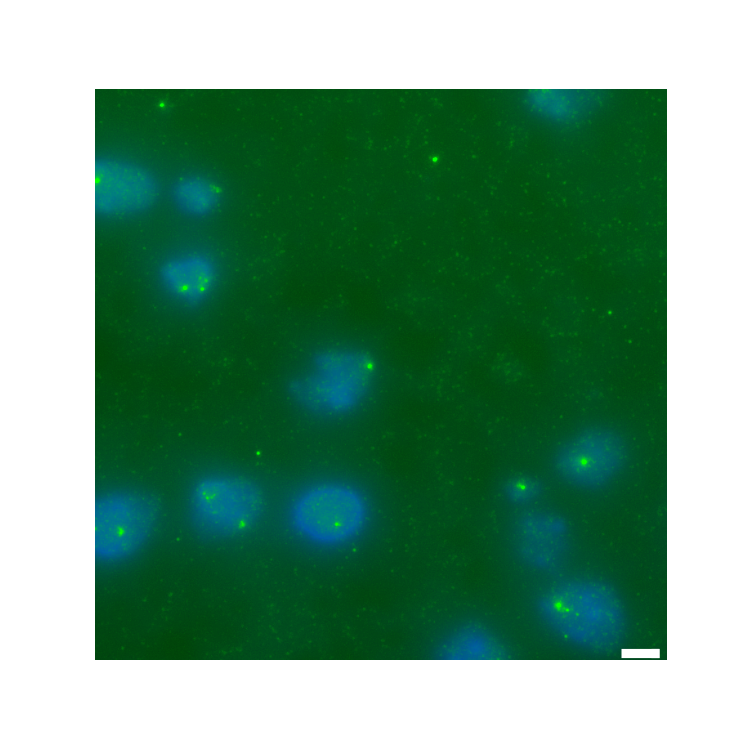

<IPython.core.display.Javascript object>


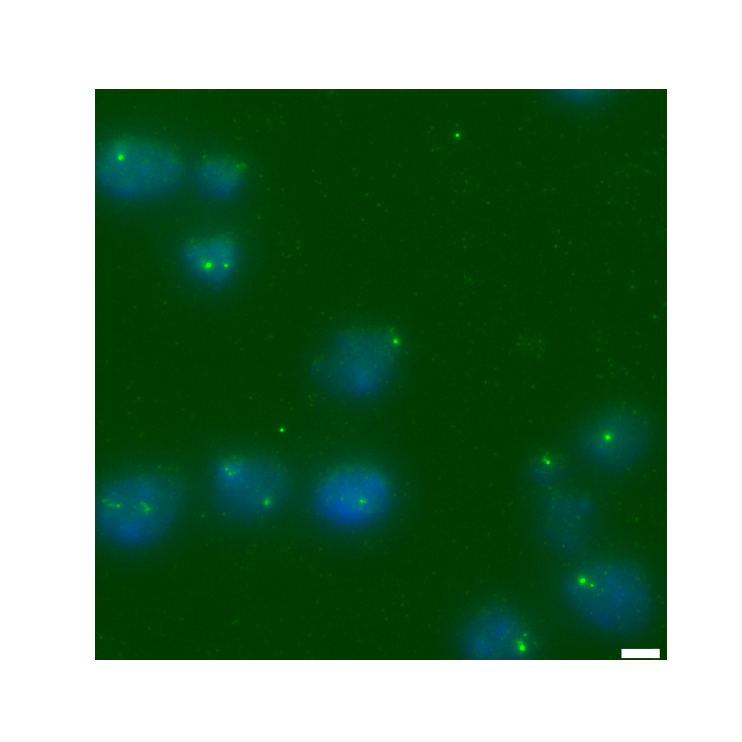

In [90]:
ax = visualize_2d_projection(before_fov.dapi_im[crop], 
                             figure_width=_single_col_width, figure_dpi=300,
                             cmap=black_gradient([0.,0.,1], transparent=False), 
                             color_limits=[1000,10000], 
                             add_reference_bar=True,
                             reference_bar_color=[1,1,1])

ax = visualize_2d_projection(before_ims[2][crop], 
                             ax=ax,
                             figure_width=_single_col_width, figure_dpi=300,
                             projection_type='max',
                             cmap=transparent_gradient([0,1.,0.]),
                             figure_alpha=1,
                             color_limits=[0,1000], 
                             reference_bar_length=5000/ia._distance_zxy[-1],
                             reference_bar_color=[1,1,1], 
                             save_folder=figure_folder, save=True, save_basename='5kb_before_clearing')


ax = visualize_2d_projection(after_fov.dapi_im[crop], 
                             figure_width=_single_col_width, figure_dpi=300,
                             cmap=black_gradient([0.,0.,1], transparent=False), 
                             color_limits=[500,5000], 
                             add_reference_bar=True,
                             reference_bar_color=[1,1,1])

ax = visualize_2d_projection(after_ims[2][crop], 
                             ax=ax,
                             figure_width=_single_col_width, figure_dpi=300,
                             projection_type='max',
                             cmap=transparent_gradient([0,1.,0.]),
                             figure_alpha=1,
                             color_limits=[0,1000], 
                             reference_bar_length=5000/ia._distance_zxy[-1],
                             reference_bar_color=[1,1,1],
                             save_folder=figure_folder, save=True, save_basename='5kb_after_clearing')